In [1]:
# Importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Setting the working Directory 
os.chdir("C:/Users/HP/Desktop/Project 2/Project 2 datasets")

In [3]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\Project 2\\Project 2 datasets'

In [4]:
# Importing the dataset
df = pd.read_csv("day.csv", sep = ",")

In [5]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
# Changing the variables into proper datatypes
df['dteday'] = pd.to_datetime(df['dteday'])

In [8]:
df['season'] = df['season'].astype(object)
df['yr'] = df['yr'].astype(object)
df['mnth'] = df['mnth'].astype(object)
df['holiday'] = df['holiday'].astype(object)
df['weekday'] = df['weekday'].astype(object)
df['workingday'] = df['workingday'].astype(object)
df['weathersit'] = df['weathersit'].astype(object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c3dc21be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c3dc372b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c3dc217f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c3dc37940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c3dc37c88>],
 'means': []}

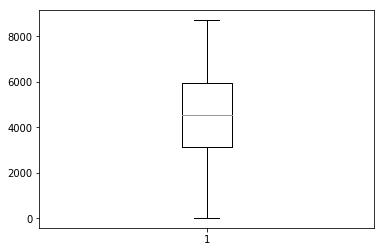

In [9]:
# Outlier Analysis Using Box plot method
plt.boxplot(df['cnt'])

In [10]:
# Saving numeric variables in cnames
cnames =["temp","atemp","hum","windspeed","casual","registered","cnt"]

In [11]:
# Loop to remove outliers 
for i in cnames:
    print(i)
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    df = df.drop(df[df.loc[:,i]<min].index)
    df = df.drop(df[df.loc[:,i]>max].index)

temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
casual
-885.0
2323.0
registered
-840.0
8018.0
cnt
-788.125
9500.875


In [12]:
# Missing values analysis
missing_val = pd.DataFrame(df.isnull().sum())

In [13]:
# No missing values present in df
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [14]:
# Delete Variables
df = df.drop(['instant','dteday'], axis = 1)

In [15]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [16]:
#Feature Selection
#Saving continous variables in cnames
cnames = ["temp","atemp","hum","windspeed","casual","registered","cnt"]

In [17]:
df_corr = df.loc[:,cnames]

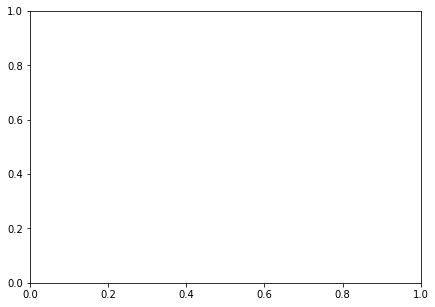

In [18]:
# Setting the width and height of the plot
f,ax = plt.subplots(figsize=(7,5))

In [19]:
# Generate co relation matrix
corr = df_corr.corr()

In [20]:

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True), square=True,ax=ax)

In [21]:
# Chi square test
# Saving all categorical variables
cat_names = ["yr","mnth","holiday","weekday","workingday","weathersit","season"]

In [22]:
# Loop for chi square test
for i in cat_names:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(df['workingday'], df[i]))
    print(p)

yr
0.05566274014463286
mnth
0.6586364687090198
holiday
1.9165041994111816e-11
weekday
3.299109693315185e-125
workingday
6.0695717403145806e-148
weathersit
0.6841395260194083
season
0.17911605411118012


In [23]:
# Delete Variables
df = df.drop(['weathersit','mnth','workingday','atemp','hum','holiday'], axis = 1)

In [24]:
df

,season,yr,weekday,temp,windspeed,casual,registered,cnt
0,1,0,6,0.344167,0.160446,331,654,985
1,1,0,0,0.363478,0.248539,131,670,801
2,1,0,1,0.196364,0.248309,120,1229,1349
3,1,0,2,0.200000,0.160296,108,1454,1562
4,1,0,3,0.226957,0.186900,82,1518,1600
5,1,0,4,0.204348,0.089565,88,1518,1606
6,1,0,5,0.196522,0.168726,148,1362,1510
7,1,0,6,0.165000,0.266804,68,891,959
8,1,0,0,0.138333,0.361950,54,768,822
9,1,0,1,0.150833,0.223267,41,1280,1321


(array([ 4., 26., 41., 47., 44., 49., 75., 98., 84., 52., 44., 43., 49.,
        20.]),
 array([  22.        ,  604.21428571, 1186.42857143, 1768.64285714,
        2350.85714286, 2933.07142857, 3515.28571429, 4097.5       ,
        4679.71428571, 5261.92857143, 5844.14285714, 6426.35714286,
        7008.57142857, 7590.78571429, 8173.        ]),
 <a list of 14 Patch objects>)

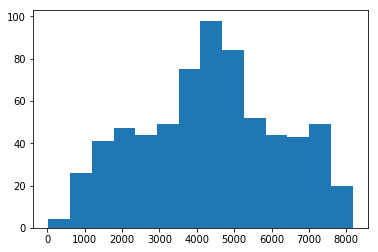

In [25]:
#Feature Scaling
plt.hist(df['cnt'], bins ='auto')

In [26]:
# Saving variables in pnames
pnames = ['casual','registered','cnt']

In [27]:
# Normalisation
for i in pnames:
    print(i)
    df[i] =(df[i] - min(df[i]))/(max(df[i])- min(df[i]))
  

casual


TypeError: 'numpy.float64' object is not callable

In [28]:
#Dividing df dataset into train and test
train, test = train_test_split(df , test_size =0.2)

In [29]:
train

,season,yr,weekday,temp,windspeed,casual,registered,cnt
593,3,1,4,0.719167,0.141796,1338,6267,7605
369,1,1,4,0.265833,0.129987,140,3132,3272
45,1,0,2,0.266087,0.291374,140,1675,1815
686,4,1,6,0.325000,0.179729,1313,4316,5629
144,2,0,3,0.660833,0.154233,740,4238,4978
69,1,0,5,0.316522,0.232970,247,1730,1977
15,1,0,0,0.231667,0.188433,251,953,1204
471,2,1,1,0.664167,0.284829,1198,5172,6370
551,3,1,4,0.827500,0.194029,1405,4836,6241
221,3,0,3,0.766667,0.200258,884,3896,4780


In [30]:
# Linear Regression Model
model = sm.OLS(train.iloc[:,7], train.iloc[:,0:7]).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#Predict the test cases
pre = model.predict(test.iloc[:,0:7])

In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pre):
    mape = np.mean(np.abs((y_true - y_pre)/y_true))
    return mape

In [ ]:
MAPE(test.iloc[:,7], pre)

In [ ]:
#Decision Tree
model_dt = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,7], train.iloc[:,0:7])

In [ ]:
# Predict Test Cases
pre_dt = model_dt.predict(test.iloc[:,0:7])

In [ ]:
#Calculate MAPE
MAPE(test.iloc[:,7], pre_dt)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators = 500).fit(train.iloc[:,7], train.iloc[:,0:7])

In [ ]:
# Predict the test cases
rf_pre = rf_model.predict(test.iloc[:,0:7])

In [ ]:
# Calculate MAPE
MAPE(test.iloc[:,7], rf_pre)